<a href="https://colab.research.google.com/github/liptiavenica/Menjelajahi-Dunia-Machine-Learning/blob/master/Bab%202/Deploy%20Model%20/Pembuatan%20%2B%20Evaluasi%20Model%20%2B%20Save%20Model%20%2B%20Deploy%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pembuatan dan Evaluasi Model**

## **1)	Memuat Data dan Mempersiapkan Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Siapkan dataset

In [2]:
import pandas as pd

# Memuat data dari file
df = pd.read_csv('/content/drive/MyDrive/Buku Machine Learning/Colaboratory/Datasets/Student_Performance.csv')

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df.iloc[:,2]=le.fit_transform(df.iloc[:,2])

In [7]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


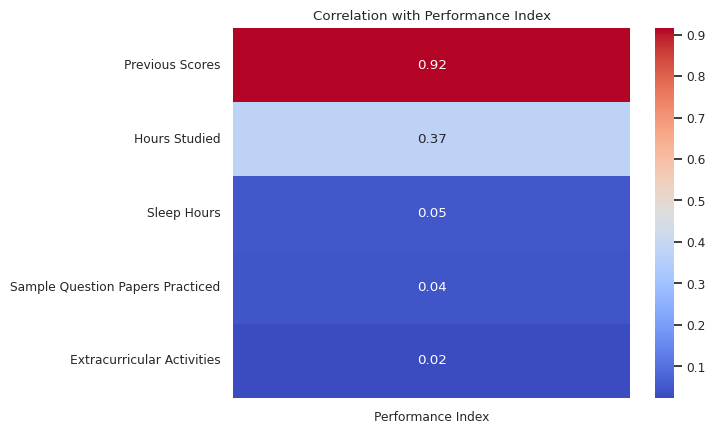

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Compute the correlation matrix
correlation_matrix = df.corr()
# #Graph I.
# plt.figure(figsize=(15, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
# plt.title("Correlation Matrix Heatmap")
# plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['Performance Index'].drop('Performance Index')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Performance Index')
plt.show()

In [10]:
# Memisahkan fitur dan label
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

## **2)	Membagi Data menjadi Data Latih dan Data Uji**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3)	Memilih dan Mengonfigurasi Model**

## **4)	Melatih Model**

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
lin_pred = lin_reg.predict(X_test)
lin_pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

## **5)	Evaluasi Model dengan Data Uji**

In [14]:
results_df = pd.DataFrame({'True Performance': y_test, 'Predicted Performance': lin_pred})
results_df

,True Performance,Predicted Performance
6252,51.0,54.711854
4684,20.0,22.615513
1731,46.0,47.903145
4742,28.0,31.289767
4521,41.0,43.004570
...,...,...
6412,45.0,46.886280
8285,66.0,62.698025
7853,16.0,16.793420
1095,65.0,63.343274


In [15]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, lin_pred)
lin_mae

1.6111213463123044

In [16]:
from sklearn.metrics import r2_score

R2Score = r2_score(y_test, lin_pred)
print(f"R^2 Score is: {R2Score*100}")

R^2 Score is: 98.89832909573146


## 6)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lin_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

lin_pipeline.fit(X_train, y_train)
lin_pipeline_pred = lin_pipeline.predict(X_test)

In [18]:
results_df = pd.DataFrame({'True Performance': y_test, 'Predicted Performance': lin_pipeline_pred})
results_df

,True Performance,Predicted Performance
6252,51.0,54.711854
4684,20.0,22.615513
1731,46.0,47.903145
4742,28.0,31.289767
4521,41.0,43.004570
...,...,...
6412,45.0,46.886280
8285,66.0,62.698025
7853,16.0,16.793420
1095,65.0,63.343274


In [19]:
lin_pipeline_mae = mean_absolute_error(y_test, lin_pipeline_pred)
lin_pipeline_mae

1.6111213463123044

In [20]:
R2Score = r2_score(y_test, lin_pipeline_pred)
print(f"R^2 Score is: {R2Score*100}")

R^2 Score is: 98.89832909573146


In [21]:
from sklearn.model_selection import GridSearchCV

f_train,f_test,g_train,g_test=train_test_split(X, y, test_size=0.2, random_state=42)

LR=LinearRegression()
parameters = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive':[True,False]}


grid_search = GridSearchCV(LR, parameters, cv=5)
grid_search.fit(f_train, g_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Score: 0.9886614186306701


## Save model

In [22]:
lin_reg_final = LinearRegression()
lin_reg_final.fit(X, y)

LinearRegression()

## Menyimpan Model ke dalam File untuk Deployment

In [23]:
import pickle

pkl_filename = "/content/drive/MyDrive/Buku Machine Learning/Colaboratory/Exported Model/lin_reg_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lin_reg_final, file)

## Deployment Model Machine Learning dengan Flask

In [24]:
!pip install flask-ngrok3
!pip install pyngrok

In [25]:
from pyngrok import ngrok

ngrok.set_auth_token("2gcpMRL8thIkdjIUzcI50l1Fd0U_6BRRHg4EML7DFzenqHqWC")

In [32]:
import numpy as np
from flask import Flask, request, jsonify, render_template
from flask_ngrok3 import run_with_ngrok
import pickle
import jinja2

In [ ]:
app = Flask(__name__, template_folder='/content/drive/MyDrive/Buku Machine Learning/Colaboratory/webapp/')
model = pickle.load(open('/content/drive/MyDrive/Buku Machine Learning/Colaboratory/Exported Model/lin_reg_model.pkl', 'rb'))# loads ML model
run_with_ngrok(app)

@app.route('/')
def home():
    return render_template('index.html') # renders index.html


@app.route('/predict',methods=['POST'])# gets the values that were sent to '/predict' by 'index.html'
def predict():
    int_features = [float(x) for x in request.form.values()] # defines the form values in an array
    final_features = [np.array(int_features)] # turns the form values into a Numpy array
    prediction = model.predict(final_features) # makes a prediction using the values in the created Numpy array

    output = prediction[0] # gets the prediction as a string

    return render_template('index.html', prediction_text='Performance Index: {}'.format(output)) # displays the prediction inside the '<p>{{ prediction_text }}</p>' that we've seen in 'index.html'

if __name__ == "__main__":
    app.run() # Runs the Web App

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://363b-34-90-229-172.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [15/Jun/2024 04:03:12] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Jun/2024 04:04:56] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Jun/2024 04:04:57] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jun/2024 04:05:08] "POST /predict HTTP/1.1" 200 -
